In [6]:
import numpy as np
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


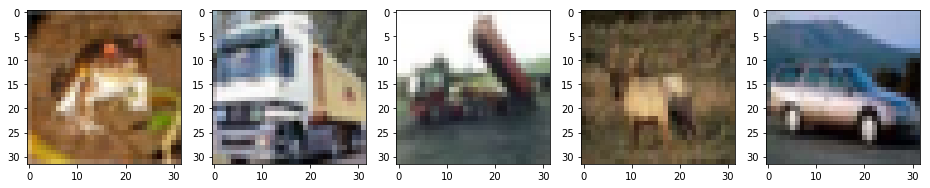

In [8]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [9]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 42s - loss: 1.8291 - acc: 0.3399 - val_loss: 1.7228 - val_acc: 0.3868
Epoch 2/15
 - 30s - loss: 1.6575 - acc: 0.4053 - val_loss: 1.6558 - val_acc: 0.4128
Epoch 3/15
 - 31s - loss: 1.5820 - acc: 0.4304 - val_loss: 1.6678 - val_acc: 0.4122
Epoch 4/15
 - 31s - loss: 1.5436 - acc: 0.4474 - val_loss: 1.6000 - val_acc: 0.4375
Epoch 5/15
 - 30s - loss: 1.5107 - acc: 0.4582 - val_loss: 1.6126 - val_acc: 0.4303
Epoch 6/15
 - 29s - loss: 1.4818 - acc: 0.4691 - val_loss: 1.5206 - val_acc: 0.4596
Epoch 7/15
 - 28s - loss: 1.4573 - acc: 0.4763 - val_loss: 1.5376 - val_acc: 0.4543
Epoch 8/15
 - 29s - loss: 1.4366 - acc: 0.4843 - val_loss: 1.5351 - val_acc: 0.4555
Epoch 9/15
 - 30s - loss: 1.4127 - acc: 0.4957 - val_loss: 1.5309 - val_acc: 0.4587
Epoch 10/15
 - 29s - loss: 1.4027 - acc: 0.4985 - val_loss: 1.5104 - val_acc: 0.4673
Epoch 11/15
 - 28s - loss: 1.3870 - acc: 0.5040 - val_loss: 1

In [12]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

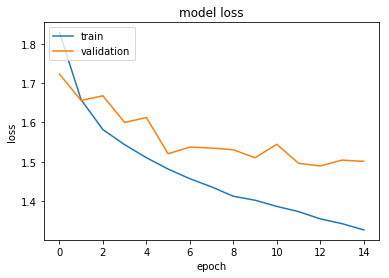

In [13]:
plotLosses(history)